In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from NumIntLib import rk_schemes as rk


In [12]:
    
def dampfunc(x, t, F0, omg, m, c, k):
    x0 = x[0] # Displacement
    x1 = x[1] # Velocity
    x2 = F0*np.sin(omg*t)/m - c*x1/m - k*x0/m # Acceleration
    return x1, x2


In [13]:

F0 = 50.0
omg = 1.0
m = 2.0
c = 1.0
k = 20

params = (F0, omg, m, c, k)

init = [0.0, 0.0] # Initial conditions
t = np.linspace(0.0, 10.0, 101)

# x = odeint(dampfunc, init, t, args=params) # This is the vital part!
x = rk.rk4(dampfunc, init, t, args=params) # This is the vital part!

acc = F0*np.sin(omg*t)/m - c*x[:,1]/m - k*x[:,0]/m


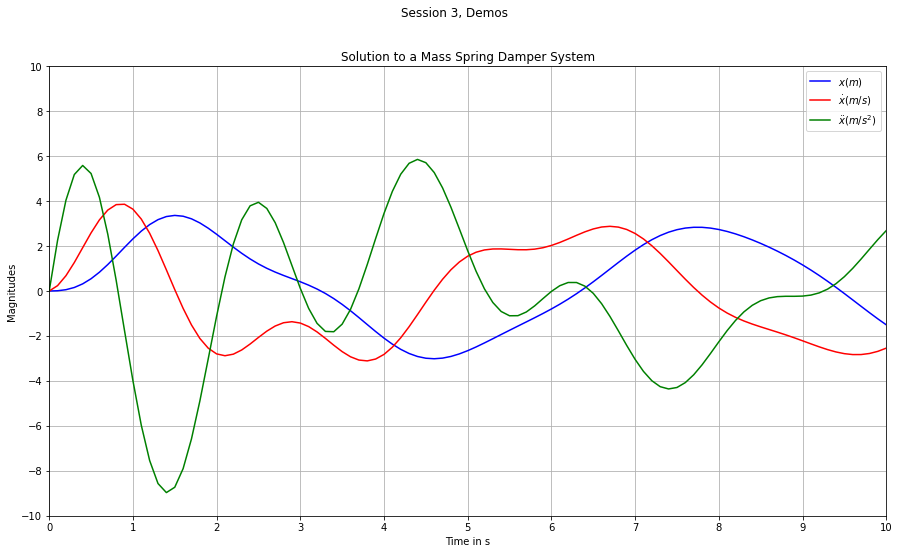

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8.27)
plt.plot(t, x[:,0], 'b', label='$x (m)$')
plt.plot(t, x[:,1], 'r', label='$\dot{x} (m/s)$')
plt.plot(t, acc, 'g', label='$\ddot{x} (m/s^2)$')
plt.axis([0, 10, -10, 10])
plt.xticks(np.linspace(0,10,11))
plt.yticks(np.linspace(-10,10,11))
plt.grid('on')
plt.legend()
plt.title('Solution to a Mass Spring Damper System')
plt.suptitle('Session 3, Demos')
plt.xlabel('Time in s')
plt.ylabel('Magnitudes')
plt.savefig('Mass_Spring_Damper.jpg', format='jpg', dpi=200)